In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro

['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']


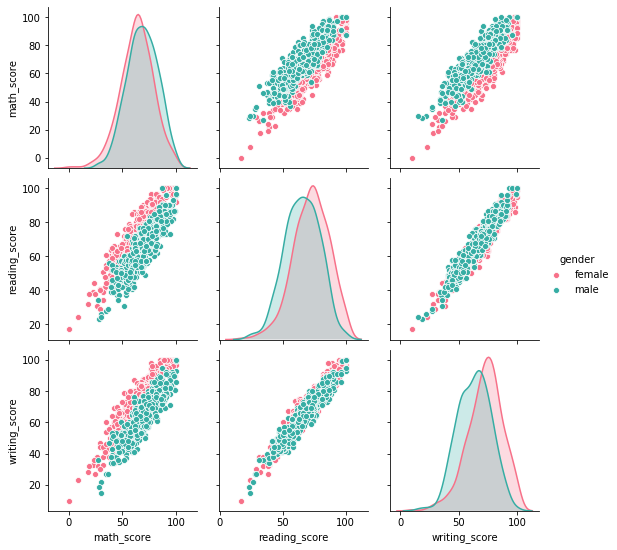

In [4]:
#load data, basic data check and visualization to start
main_data_set = '/Users/maryfutey/desktop/classes/python_sem2/HW3/StudentsPerformance.csv'
df = pd.read_csv(main_data_set)

print(list(df))
print(df.dtypes)

p1 = sns.pairplot(df, hue = "gender", palette="husl",
                  vars=["math_score", "reading_score", "writing_score"])
plt.show()

(0.9931508302688599, 0.0001453401637263596)
(0.9929210543632507, 0.0001056220498867333)
(0.9919633269309998, 2.9172901122365147e-05)


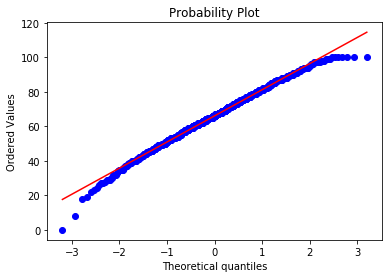

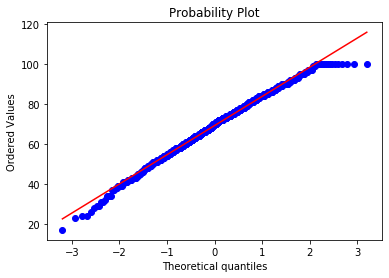

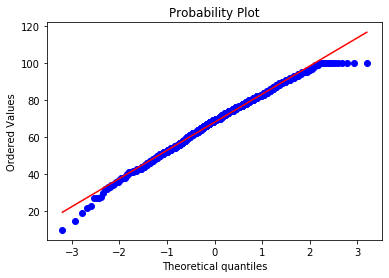

(0.817579663672054, 1.787753109905834e-241)
SpearmanrResult(correlation=0.8040638885551747, pvalue=1.3538514946746025e-227)
(0.8026420459498078, 3.3760270425694173e-226)
SpearmanrResult(correlation=0.7783385899971924, pvalue=5.853058974157784e-204)
(0.9545980771462479, 0.0)
SpearmanrResult(correlation=0.9489525187100921, pvalue=0.0)


In [5]:
# explore whether there are any dependences between reading/writing/math_scores

math_score = df.math_score.values
reading_score = df.reading_score.values
writing_score = df.writing_score.values

#check to see if data is normal using Shapiro test (looks normal and p values low)
print(shapiro(df["math_score"]))
print(shapiro(df["reading_score"]))
print(shapiro(df["writing_score"]))

#and with probability plot (also looks good)
p2 = stats.probplot(math_score, dist="norm", plot=plt)
plt.show()
p3 = stats.probplot(reading_score, dist="norm", plot=plt)
plt.show()
p4 = stats.probplot(writing_score, dist="norm", plot=plt)
plt.show()


#Check Spearman Vs Pearson values - comparable
print(stats.pearsonr(math_score, reading_score))
print(stats.spearmanr(math_score, reading_score))

print(stats.pearsonr(math_score, writing_score))
print(stats.spearmanr(math_score, writing_score))

print(stats.pearsonr(reading_score, writing_score))
print(stats.spearmanr(reading_score, writing_score))



In [6]:
#linear regression
X = df["math_score"].values.reshape(-1,1)
y = df["reading_score"].values.reshape(-1,1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("predictor math, response reading")
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')


X = df["math_score"].values.reshape(-1,1)
y = df["writing_score"].values.reshape(-1,1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("predictor math, writing reading")
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

X = df["reading_score"].values.reshape(-1,1)
y = df["writing_score"].values.reshape(-1,1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("predictor reading, response writing")
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')


predictor math, response reading
Coefficients: [[0.78722924]]
Intercept: [17.14180679]
R^2 score: 0.6684365064501091
predictor math, writing reading
Coefficients: [[0.80436647]]
Intercept: [14.89422427]
R^2 score: 0.6442342539264932
predictor reading, response writing
Coefficients: [[0.99353111]]
Intercept: [-0.66755364]
R^2 score: 0.9112574888913137


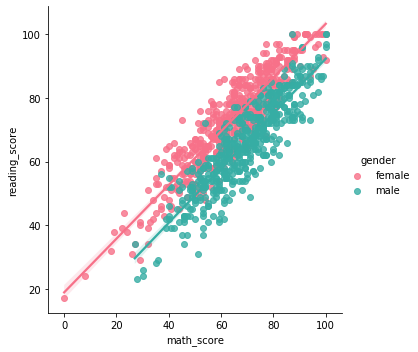

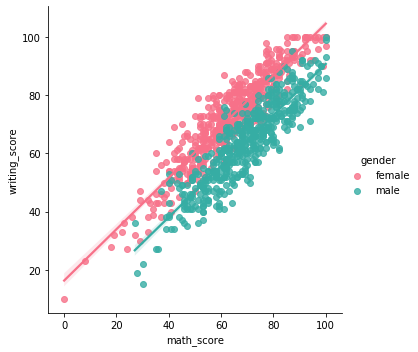

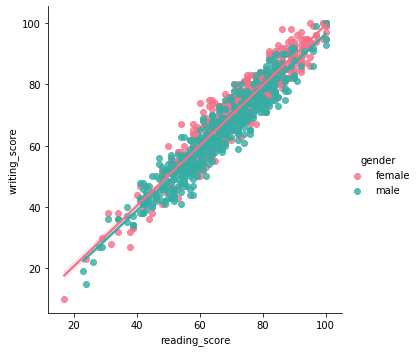

In [7]:
#visualization of linear regression
p5 = sns.lmplot(x= "math_score", y="reading_score",
                hue="gender", palette="husl", data=df)
plt.show()

p6 = sns.lmplot(x="math_score", y="writing_score",
                hue= "gender", palette="husl", data=df)
plt.show()

p7 = sns.lmplot(x="reading_score", y="writing_score",
                hue='gender', palette="husl", data=df)
plt.show()


In [8]:
# find out whether student's race and parents' level_of_education influences
# lunch_type of their children

df["race/ethnicity"] = df["race/ethnicity"].astype("category").cat.codes
df["lunch"] = df['lunch'].astype("category").cat.codes
df["parental_level_of_education"] = df["parental_level_of_education"].astype('category').cat.codes


print(df["race/ethnicity"].corr(df["lunch"]))
print(df["parental_level_of_education"].corr(df["lunch"]))

0.04656258954771701
0.006319907050483058
